In [1]:
import sys, os
sys.path.append("../..")
sys.path.append("..")
sys.path.append(os.getcwd())

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import copy
import pickle

# from mrsc.src.model.SVDmodel import SVDmodel
# from mrsc.src.model.Target import Target
# from mrsc.src.model.Donor import Donor
# from mrsc.src.synthcontrol.mRSC import mRSC
# from mrsc.src.importData import *
import mrsc.src.utils as utils

from itertools import combinations, product

In [3]:
df_true = pd.read_pickle("true_all.pkl")
df_pred = pd.read_pickle("pred_all.pkl")

In [17]:
mask = (df_true !=0 )
mape = np.abs(df_true - df_pred) / df_true[mask]
mape

,Al Horford,Al Jefferson,Al-Farouq Aminu,Alan Anderson,Alec Burks,Alonzo Gee,Amar'e Stoudemire,Amir Johnson,Anderson Varejao,Andre Iguodala,...,Tyler Hansbrough,Tyreke Evans,Tyson Chandler,Udonis Haslem,Vince Carter,Wayne Ellington,Wesley Johnson,Wesley Matthews,Zach Randolph,Zaza Pachulia
PTS_G,0.061207,0.245780,0.422007,2.343899,0.134743,0.065821,0.884711,0.327355,2.009445,0.201863,...,0.269100,0.201133,0.089687,1.258787,0.215581,0.186348,0.252469,0.195993,0.335342,0.517399
AST_G,0.189830,0.121536,0.354222,2.798973,0.687513,1.141455,0.020996,0.129153,1.883650,0.024054,...,0.578095,0.051220,0.035844,0.373526,0.876798,0.271643,1.047468,0.161879,0.299282,0.020041
TOV_G,0.268433,0.184230,0.454078,21.651720,0.308005,0.090326,0.713830,0.319796,2.064051,0.108794,...,0.770770,0.254740,0.158852,2.265656,0.095698,0.337908,0.478297,0.240173,0.154326,0.207283
3P_G,0.856527,NaN,0.682789,0.048087,0.037239,0.711664,NaN,0.601566,NaN,0.217569,...,0.564252,0.220807,NaN,0.010678,0.392744,0.200653,0.489980,0.281916,0.010995,NaN
PER_w,0.152905,0.120552,0.109182,0.139438,0.106240,0.278270,0.079423,0.146289,0.146830,0.049248,...,0.063167,0.136362,0.205004,0.074063,0.052177,0.060482,0.153852,0.206893,0.226562,0.350881
FG%,0.015530,0.047523,0.006808,0.097099,0.014564,0.184622,0.162148,0.065937,0.109083,0.104505,...,0.056955,0.009193,0.105358,0.195894,0.043371,0.032127,0.022787,0.101926,0.107648,0.095033
FT%,0.106229,0.054207,0.026584,0.109474,0.009635,0.079989,0.005928,0.227461,0.027119,0.095362,...,0.242661,0.065423,0.001040,0.037954,0.018331,0.026613,0.139287,0.066115,0.086903,0.069343
TRB_G,0.112196,0.257040,0.031178,0.329870,0.199432,0.384993,0.008119,0.087791,2.165016,0.106656,...,0.662117,0.176805,0.237832,1.038872,0.152187,0.104316,0.307834,0.110419,0.049157,0.535361
STL_G,0.025305,0.264683,0.099151,0.297141,0.301137,0.611530,0.145361,0.034812,1.722190,0.030233,...,0.028519,0.122394,0.051528,0.847593,0.051685,0.408348,0.100681,0.079786,0.058122,0.210301
BLK_G,0.122451,0.059808,0.104246,0.160190,0.054151,0.309389,0.398344,0.298012,1.016502,0.049414,...,0.221126,0.332568,0.710151,2.718865,0.023397,0.683738,0.013779,0.513383,0.200208,0.153582


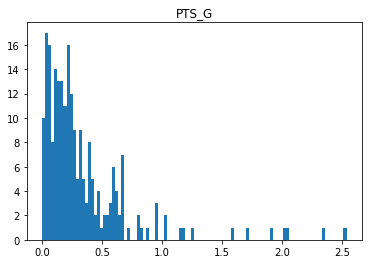

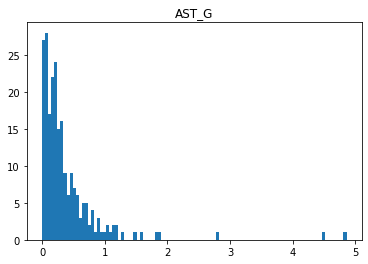

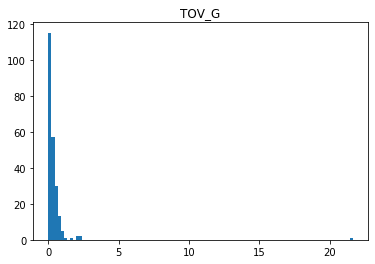

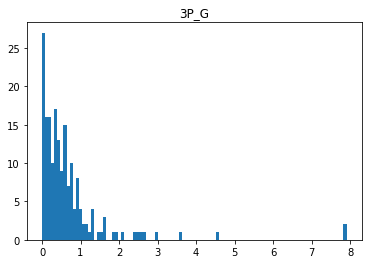

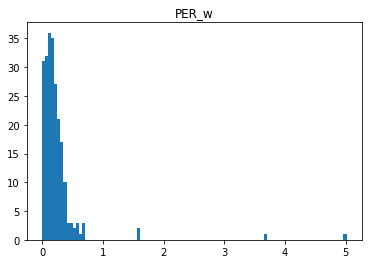

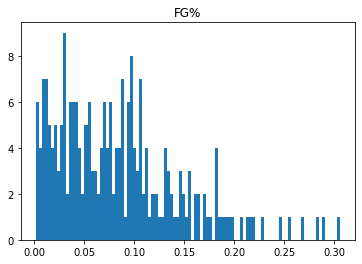

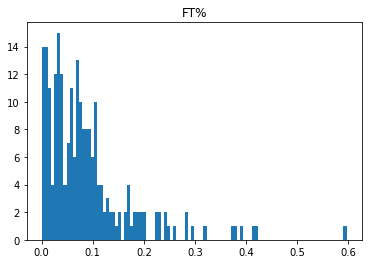

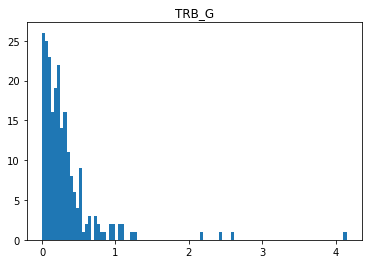

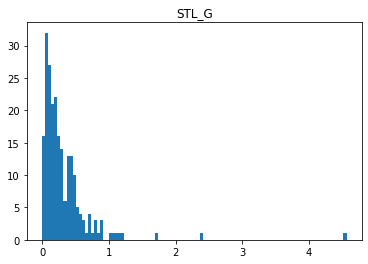

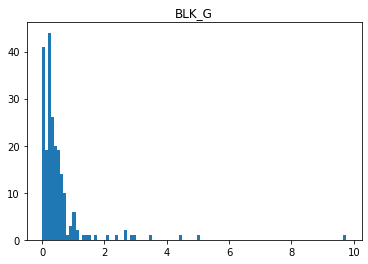

In [33]:
for i in range(10):
    plt.hist(mape.iloc[i].values, bins=100)
    plt.title(mape.index[i])
    plt.show()

In [32]:
for i in range(10):
    print()
    print(mape.index[i])
    print(mape.iloc[i].sort_values(ascending=False)[:20])


PTS_G
Nikola Pekovic       2.538408
Alan Anderson        2.343899
Chris Kaman          2.046855
Anderson Varejao     2.009445
Ty Lawson            1.913195
Mike Miller          1.712097
Tayshaun Prince      1.581606
Udonis Haslem        1.258787
Joakim Noah          1.190321
Caron Butler         1.142543
Omer Asik            1.027954
Brandon Jennings     1.022744
Josh Smith           0.960747
Andrea Bargnani      0.959237
Greivis Vasquez      0.957999
Amar'e Stoudemire    0.884711
Drew Gooden          0.825077
Jimmer Fredette      0.810855
Nick Young           0.798916
Jason Thompson       0.726529
Name: PTS_G, dtype: float64

AST_G
Jeremy Evans        4.860110
Jimmer Fredette     4.474247
Alan Anderson       2.798973
Anderson Varejao    1.883650
Andrea Bargnani     1.811287
Ty Lawson           1.601707
Enes Kanter         1.463951
Lance Stephenson    1.296232
Omer Asik           1.211944
Drew Gooden         1.192130
Paul Pierce         1.159777
Alonzo Gee          1.141455
DeJuan Bla